In [14]:
import psycopg2

In [146]:
#Вводим соответствующие реквизиты для импорта базы данных

conn = psycopg2.connect(dbname='taxi', user='etl_tech_user', 
                        password='etl_tech_user_password', host='de-edu-db.chronosavant.ru')
cursor = conn.cursor()

#Какой-нибудь SQL запрос
cursor.execute(
'''

select * from main.movement
where car_plate_num in (select plate_num from main.car_pool
                  where model = 'Kia Rio'
                  )

'''
)
data = list(cursor.fetchall())

In [147]:
data[:5]

[(3, 'Р071ХС77 ', 3, 'READY', datetime.datetime(2022, 10, 12, 12, 55, 4)),
 (5, 'Р071ХС77 ', 3, 'BEGIN', datetime.datetime(2022, 10, 12, 12, 56, 3)),
 (7, 'Р023ЕН77 ', 5, 'READY', datetime.datetime(2022, 10, 12, 12, 59, 3)),
 (9, 'М506СН77 ', 6, 'READY', datetime.datetime(2022, 10, 12, 13, 2, 3)),
 (10, 'А591ЕУ77 ', 7, 'READY', datetime.datetime(2022, 10, 12, 13, 2, 3))]

Непонятно, как извлекать данные из 2-ого пункта:
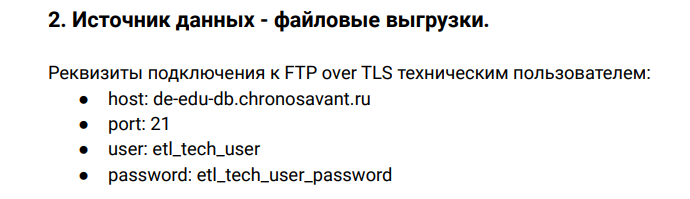

К серверу подключается, но дальше хз

In [63]:
#from ftplib import FTP_TLS
import ftplib

In [113]:
host = 'de-edu-db.chronosavant.ru'
ftp_user = 'etl_tech_user'
ftp_password = 'etl_tech_user_password'
port = 21
ftps = FTP_TLS(host)
ftps.login(ftp_user, ftp_password)

#ftps.getwelcome()
#Проверяем текущее состояние папок
#directory_list = ftps.nlst() #загоняем в переменную list список содержимого директории
#print(directory_list)

ftps.mlsd(path = "", facts = [])
ftps.cwd('/waybills')
#ftps.nlst()

'250 Directory successfully changed.'

# 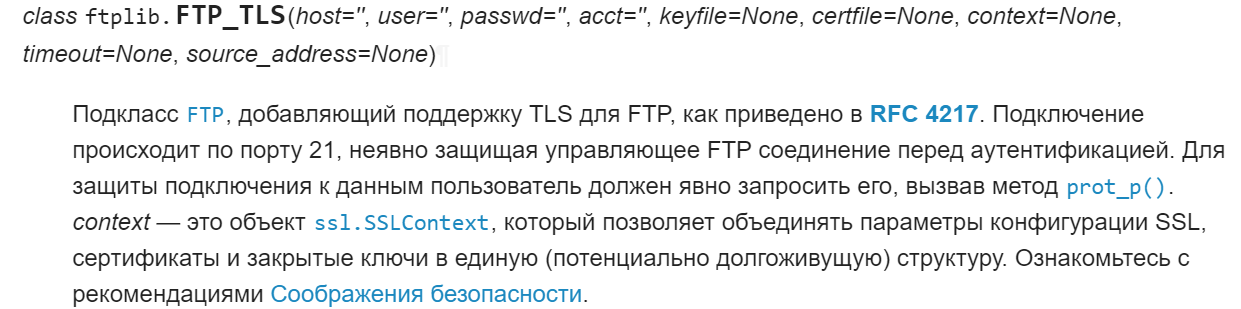


In [112]:
ftps = FTP_TLS('ftp.pureftpd.org')
ftps.login()
#'230 Anonymous user logged in'
#ftps.prot_p()
#'200 Data protection level set to "private"'
ftps.cwd('/mysql-udf-global-user-variables')
#ftps.pwd()
ftps.nlst()


['.',
 '..',
 'global-user-variables-1.2.tar.gz.sig',
 'global-user-variables-1.2.tar.gz']